In [1]:
import pandas as pd
import sys
import os
import numpy as np

# añadir carpeta padre al path
sys.path.append(os.path.abspath(".."))

from factorial_analisis import analisis_factorial_por_etapa, pruebas_no_parametricas, asignar_etapa



In [2]:
PATH = '../../datos/datos_por_estacion/SUROESTE2.xlsx'

In [3]:
df_2021 = pd.read_excel(PATH, sheet_name='2021')
df_2022 = pd.read_excel(PATH, sheet_name='2022')
df_2023 = pd.read_excel(PATH, sheet_name='2023')
df_2024 = pd.read_excel(PATH, sheet_name='2024')

df = pd.concat([df_2021, df_2022, df_2023, df_2024], ignore_index=True)

In [4]:
df

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
0,2021-01-01 00:00:00,3.62,2.1,15.1,17.0,18.0,79.0,NaN,NaN,NaN,43.0,3.2,0.0,11.70,NaN,NaN
1,2021-01-01 01:00:00,3.91,4.9,22.5,27.3,5.0,74.0,NaN,712.5,0.0,62.0,3.2,0.0,9.07,0.6,98.0
2,2021-01-01 02:00:00,3.57,2.1,11.9,13.9,15.0,106.0,NaN,712.5,0.0,67.0,3.2,0.0,7.78,0.6,107.0
3,2021-01-01 03:00:00,3.61,2.2,16.3,18.4,10.0,63.0,NaN,712.7,0.0,69.0,3.1,0.0,6.98,0.6,106.0
4,2021-01-01 04:00:00,3.61,3.6,21.5,25.1,4.0,63.0,NaN,712.8,0.0,72.0,3.2,0.0,6.22,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31384,2024-07-31 19:00:00,0.50,3.7,5.9,9.6,22.0,85.0,16.0,713.8,0.0,53.0,2.4,0.0,28.34,12.8,194.0
31385,2024-07-31 20:00:00,0.48,5.1,7.4,12.5,20.0,82.0,19.0,714.0,0.0,52.0,2.3,0.0,27.95,14.5,180.0
31386,2024-07-31 21:00:00,0.46,3.3,6.4,9.8,21.0,74.0,24.0,714.2,0.0,53.0,2.3,0.0,27.38,14.1,188.0
31387,2024-07-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
columns = ['CO', 'PM10', 'PM2.5', 'SO2', 'NO2', 'O3', 'date']

df = df[columns]

In [7]:
df

,CO,PM10,PM2.5,SO2,NO2,O3,date
0,3.62,79.0,NaN,3.2,15.1,18.0,2021-01-01 00:00:00
1,3.91,74.0,NaN,3.2,22.5,5.0,2021-01-01 01:00:00
2,3.57,106.0,NaN,3.2,11.9,15.0,2021-01-01 02:00:00
3,3.61,63.0,NaN,3.1,16.3,10.0,2021-01-01 03:00:00
4,3.61,63.0,NaN,3.2,21.5,4.0,2021-01-01 04:00:00
...,...,...,...,...,...,...,...
31384,0.50,85.0,16.0,2.4,5.9,22.0,2024-07-31 19:00:00
31385,0.48,82.0,19.0,2.3,7.4,20.0,2024-07-31 20:00:00
31386,0.46,74.0,24.0,2.3,6.4,21.0,2024-07-31 21:00:00
31387,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-31 22:00:00


In [8]:
df["fecha"] = df["date"]

C:\Users\Vivi\AppData\Local\Temp\ipykernel_23656\3120508067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fecha"] = df["date"]


In [9]:
df = asignar_etapa(df)

In [11]:
df

,CO,PM10,PM2.5,SO2,NO2,O3,date,fecha,etapa
0,4.95,68.0,64.10,3.2,NaN,22.0,2021-01-01 00:00:00,2021-01-01 00:00:00,0
1,4.73,68.0,46.00,3.3,NaN,27.0,2021-01-01 01:00:00,2021-01-01 01:00:00,0
2,4.72,55.0,47.64,3.3,NaN,23.0,2021-01-01 02:00:00,2021-01-01 02:00:00,0
3,4.82,57.0,52.07,3.6,15.8,25.0,2021-01-01 03:00:00,2021-01-01 03:00:00,0
4,5.02,65.0,61.62,3.5,NaN,25.0,2021-01-01 04:00:00,2021-01-01 04:00:00,0
...,...,...,...,...,...,...,...,...,...
31384,0.60,77.0,32.42,2.7,6.4,28.0,2024-07-31 19:00:00,2024-07-31 19:00:00,2
31385,0.57,89.0,31.45,2.7,6.7,23.0,2024-07-31 20:00:00,2024-07-31 20:00:00,2
31386,0.59,90.0,31.75,2.7,6.0,23.0,2024-07-31 21:00:00,2024-07-31 21:00:00,2
31387,0.57,85.0,33.73,2.7,5.9,22.0,2024-07-31 22:00:00,2024-07-31 22:00:00,2


In [10]:
resultados = pruebas_no_parametricas(df, columns, tipo='independiente')

In [11]:
resultados

,Contaminante,Comparacion,Estadistico,p-valor
0,CO,0 vs 1,103994270.5,1.986541e-197
1,CO,0 vs 2,15704728.0,1.868866e-280
2,CO,1 vs 2,11647894.0,0.000000e+00
3,PM10,0 vs 1,97868063.0,4.733337e-66
4,PM10,0 vs 2,22763912.0,1.862699e-08
5,PM10,1 vs 2,18438584.0,4.078004e-55
6,PM2.5,0 vs 1,82605178.5,8.024677e-18
7,PM2.5,0 vs 2,18774947.0,1.725847e-43
8,PM2.5,1 vs 2,16573946.0,2.535224e-68
9,SO2,0 vs 1,99055454.5,2.607475e-160



=== Etapa 0 ===
Chi-cuadrado Bartlett: 12794.62, p-valor: 0.000
KMO global: 0.655
=> Datos adecuados para análisis factorial
Número de factores sugerido (eigen>1): 2


c:\Users\Vivi\Documents\Repos\Anlaisis-de-Calidad-del-Aire\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vivi\Documents\Repos\Anlaisis-de-Calidad-del-Aire\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


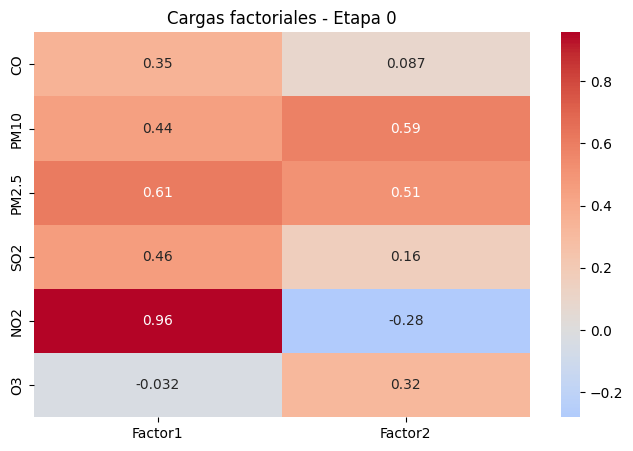


=== Etapa 1 ===
Chi-cuadrado Bartlett: 16526.13, p-valor: 0.000
KMO global: 0.694
=> Datos adecuados para análisis factorial


c:\Users\Vivi\Documents\Repos\Anlaisis-de-Calidad-del-Aire\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Número de factores sugerido (eigen>1): 2


c:\Users\Vivi\Documents\Repos\Anlaisis-de-Calidad-del-Aire\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


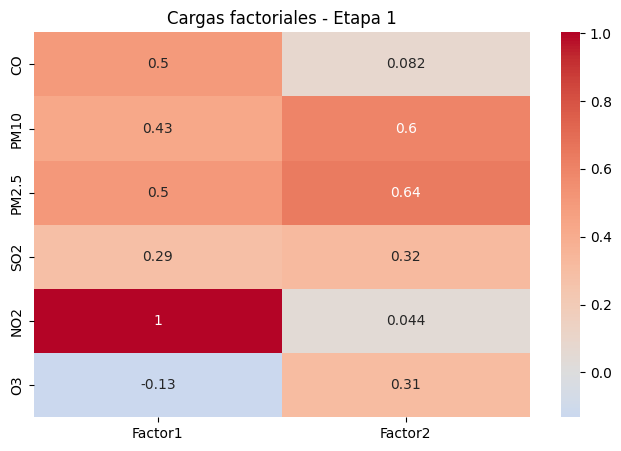


=== Etapa 2 ===
Chi-cuadrado Bartlett: 4831.16, p-valor: 0.000
KMO global: 0.669
=> Datos adecuados para análisis factorial
Número de factores sugerido (eigen>1): 2


c:\Users\Vivi\Documents\Repos\Anlaisis-de-Calidad-del-Aire\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vivi\Documents\Repos\Anlaisis-de-Calidad-del-Aire\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


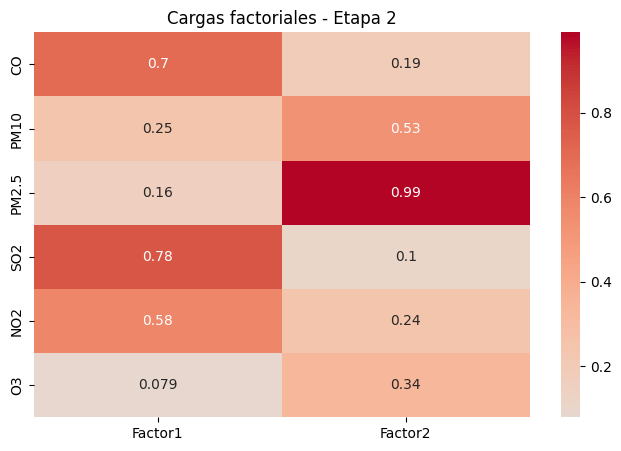

In [ ]:
contaminantes = ['CO', 'PM10', 'PM2.5', 'SO2', 'NO2', 'O3']

# Supongamos df ya tiene columna 'etapa' creada~
resultados_fa = analisis_factorial_por_etapa(df, variables=contaminantes)
